<a href="https://colab.research.google.com/github/melinadwisafitri/mental-care/blob/machine-learning/Chatbot_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [268]:
pip install Sastrawi

In [269]:
import urllib.request
import json
import numpy as np

import nltk
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [270]:
data_url = 'https://raw.githubusercontent.com/melinadwisafitri/mental-care/machine-learning/dataset/data.json'
urllib.request.urlretrieve(data_url, 'data.json')

('data.json', <http.client.HTTPMessage at 0x7f1cbfdbc890>)

In [271]:
with open('data.json', 'r') as f:
  data = json.load(f)

In [272]:
kata = []
kelas = []
dokumen = []

punct = ['!', '?', ',', '.']

stop = stopwords.words('indonesian')
for data in data['mental_healths']:
  for question in data['question']:
    word = question.lower()
    word = word.translate(str.maketrans("","",string.punctuation))
    word = word_tokenize(word)
    if word in stop:
      continue
    kata.extend(word)
    dokumen.append((word, data['tag']))
    if data['tag'] not in kelas:
      kelas.append(data['tag'])
     

In [273]:
print(dokumen)
print(kata)
print(kelas)

[(['hai'], 'salam_pembuka'), (['hallo'], 'salam_pembuka'), (['apa', 'kabar'], 'salam_pembuka'), (['terimakasih'], 'salam_penutup'), (['sampai', 'ketemu', 'lagi'], 'salam_penutup'), (['apa', 'itu', 'kesehatan', 'mental'], 'pengertian_mental_health'), (['kesehatan', 'mental'], 'pengertian_mental_health'), (['apa', 'yang', 'dimaksud', 'dengan', 'kesehatan', 'mental'], 'pengertian_mental_health'), (['kesehatan', 'mental', 'adalah'], 'pengertian_mental_health'), (['apa', 'saja', 'jenisjenis', 'gangguan', 'mental'], 'jenis_mental_health'), (['jenisjenis', 'gangguan', 'mental'], 'jenis_mental_health'), (['apa', 'saja', 'macammacam', 'gangguan', 'mental'], 'jenis_mental_health'), (['macammacam', 'gangguan', 'mental'], 'jenis_mental_health'), (['apa', 'saja', 'gejalagejala', 'gangguan', 'mental'], 'gejala_kesehatan_mental'), (['gejala', 'gangguan', 'mental'], 'gejala_kesehatan_mental'), (['tandatanda', 'gangguan', 'mental'], 'gejala_kesehatan_mental'), (['bagaimana', 'mengetahui', 'bahwa', 'kit

In [274]:
import pickle

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#w = w.translate(str.maketrans("","",string.punctuation))
# kata = "kesehatan mental adalah. , ;"
# stemmer.stem(kata)

kata = [stemmer.stem(w.lower()) for w in kata if w not in punct]
kata = sorted(list(set(kata)))
kelas = sorted(list(set(kelas)))
print (len(dokumen), "dokumen")
print (len(kelas), "kelas", kelas)
print (len(kata), "unique stemming words", kata)
pickle.dump(kata,open('kata.pkl','wb')) 
pickle.dump(kelas,open('kelas.pkl','wb'))

99 dokumen
29 kelas ['bipolar', 'ciri_kesehatan_mental', 'curhat', 'emosi', 'faktor_lingkungan', 'faktor_mental_health', 'faktor_resiko_gangguan_mental', 'gejala_kesehatan_mental', 'hukum_kesehatan_jiwa', 'jenis_mental_health', 'kesadaran_diri', 'keyakinan_diri', 'komunikasi', 'mengatasi_nervous', 'menjaga_kesehatan_mental', 'mental_breakdown', 'pencegahan', 'pengertian_mental_health', 'pentingnya_kesehatan_mental', 'penyebab_gangguan_mental', 'percaya_diri', 'pertolongan_pertama', 'sabar', 'salam_pembuka', 'salam_penutup', 'sedih', 'skizofrenia', 'solusi_kesehatan_mental', 'sosial_media']
126 unique stemming words ['ada', 'adalah', 'agar', 'apa', 'apakah', 'atas', 'atau', 'bagai', 'bagaimana', 'bagi', 'bahwa', 'baik', 'belum', 'bipolar', 'breakdown', 'cara', 'cegah', 'cerita', 'ceritacurhat', 'ciri', 'ciriciri', 'curhat', 'dampak', 'dan', 'dapat', 'dari', 'dengan', 'diri', 'efektif', 'emosi', 'faktor', 'faktorfaktor', 'ganggu', 'gejala', 'gejalagejala', 'gugup', 'hadap', 'hai', 'hal',

In [275]:
import random
import numpy as np

training = []
output_empty = [0] * len(kelas)
for doc in dokumen:
    bag = []
    pattern_words = doc[0]
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    for w in kata:
        bag.append(1) if w in pattern_words else bag.append(0)
    output_row = list(output_empty)
    output_row[kelas.index(doc[1])] = 1

    training.append([bag, output_row])
random.shuffle(training)
training = np.array(training)
x_train = list(training[:,0])
y_train = list(training[:,1])

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [276]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import tensorflow as tf

model = Sequential() 
model.add(Dense(128, input_shape=(len(x_train[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y_train[0]), activation='softmax'))

# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
#     tf.keras.layers.LSTM(64),
#     tf.keras.layers.Dense(128,input_shape=(len(x_train[0]),), activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(len(y_train[0]), activation='softmax')
# ]) 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(np.array(x_train), np.array(y_train), validation_data=(np.array(x_test), np.array(y_test)), epochs=200, batch_size=5, verbose=1) 

Epoch 1/200
14/14 [==============================] - 1s 15ms/step - loss: 3.3465 - accuracy: 0.0580 - val_loss: 3.3918 - val_accuracy: 0.0333
Epoch 2/200
14/14 [==============================] - 0s 5ms/step - loss: 3.3249 - accuracy: 0.0435 - val_loss: 3.3765 - val_accuracy: 0.0000e+00
Epoch 3/200
14/14 [==============================] - 0s 5ms/step - loss: 3.2864 - accuracy: 0.0580 - val_loss: 3.3518 - val_accuracy: 0.0667
Epoch 4/200
14/14 [==============================] - 0s 4ms/step - loss: 3.2581 - accuracy: 0.0435 - val_loss: 3.3343 - val_accuracy: 0.0667
Epoch 5/200
14/14 [==============================] - 0s 5ms/step - loss: 3.2158 - accuracy: 0.1304 - val_loss: 3.3142 - val_accuracy: 0.0667
Epoch 6/200
14/14 [==============================] - 0s 5ms/step - loss: 3.1409 - accuracy: 0.1739 - val_loss: 3.3023 - val_accuracy: 0.1000
Epoch 7/200
14/14 [==============================] - 0s 4ms/step - loss: 3.1654 - accuracy: 0.1739 - val_loss: 3.2765 - val_accuracy: 0.1000
Epoch 8/

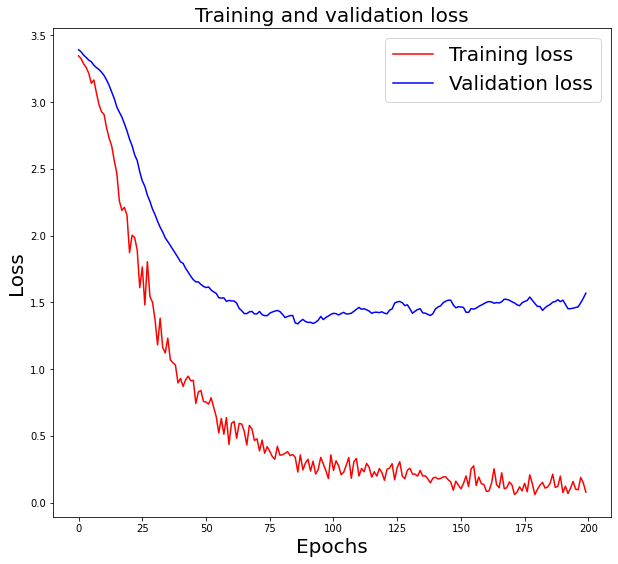

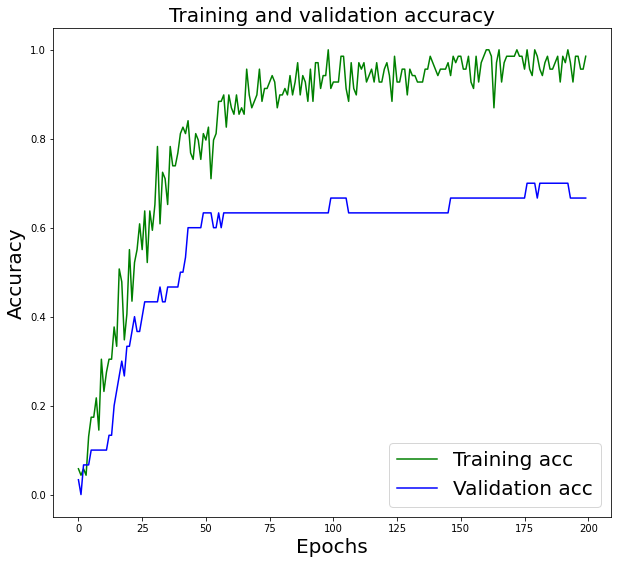

In [277]:
import matplotlib.pyplot as plt

history_dict = hist.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = hist.epoch

plt.figure(figsize=(10,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(10,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.show()

In [278]:
model = model.save("chatbot.h5")